In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cbsyst as cb

import uncertainties as un
import uncertainties.unumpy as unp
nom = unp.nominal_values
err = unp.std_devs

from b_funks.helpers import isolate_constant_conditions
from b_funks.previous_models import fit_data_with_previous_models
from b_funks import load

In [44]:
plt.style.use('presentation')

In [51]:
# our data
dat = load.b_data()

# other data
odat = load.b_data(None)
# remove our data
# odat = odat.loc[odat.Measured.who != 'This study', :]
# planktic only
odat = odat.loc[~odat.Measured.Species.str.contains('lessonii'), :]

In [86]:
cdict = {
    'universa': 'C1',
    'sacculifer': 'C2',
    'ruber': 'C3',
}

mdict = {
    'This Study': 'o', 
    'Haynes et al. (2017)': 's',
    'Haynes et al. (2019)': 'd',
    'Howes et al. (2017)': '+',
    'Allen et al. (2011)': 'v',
    'Allen et al. (2012)': '^',
    'Henehan et al. (2015)': '*',
}

scatter_opts = {'lw': 0.3, 'edgecolor': 'grey'}

/tmp/ipykernel_48909/2524850268.py:15: UserWarning: You passed a edgecolor/edgecolors ('grey') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(g.csys_mid[xv], nom(g.Measured['B/Caf'] / g.Measured['[B]sw']), c=cdict[species], marker=mdict[who], **scatter_opts)
/tmp/ipykernel_48909/2524850268.py:25: UserWarning: You passed a edgecolor/edgecolors ('grey') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0,-1].scatter([],[],label=who,marker=mdict[who], **scatter_opts, color='grey')


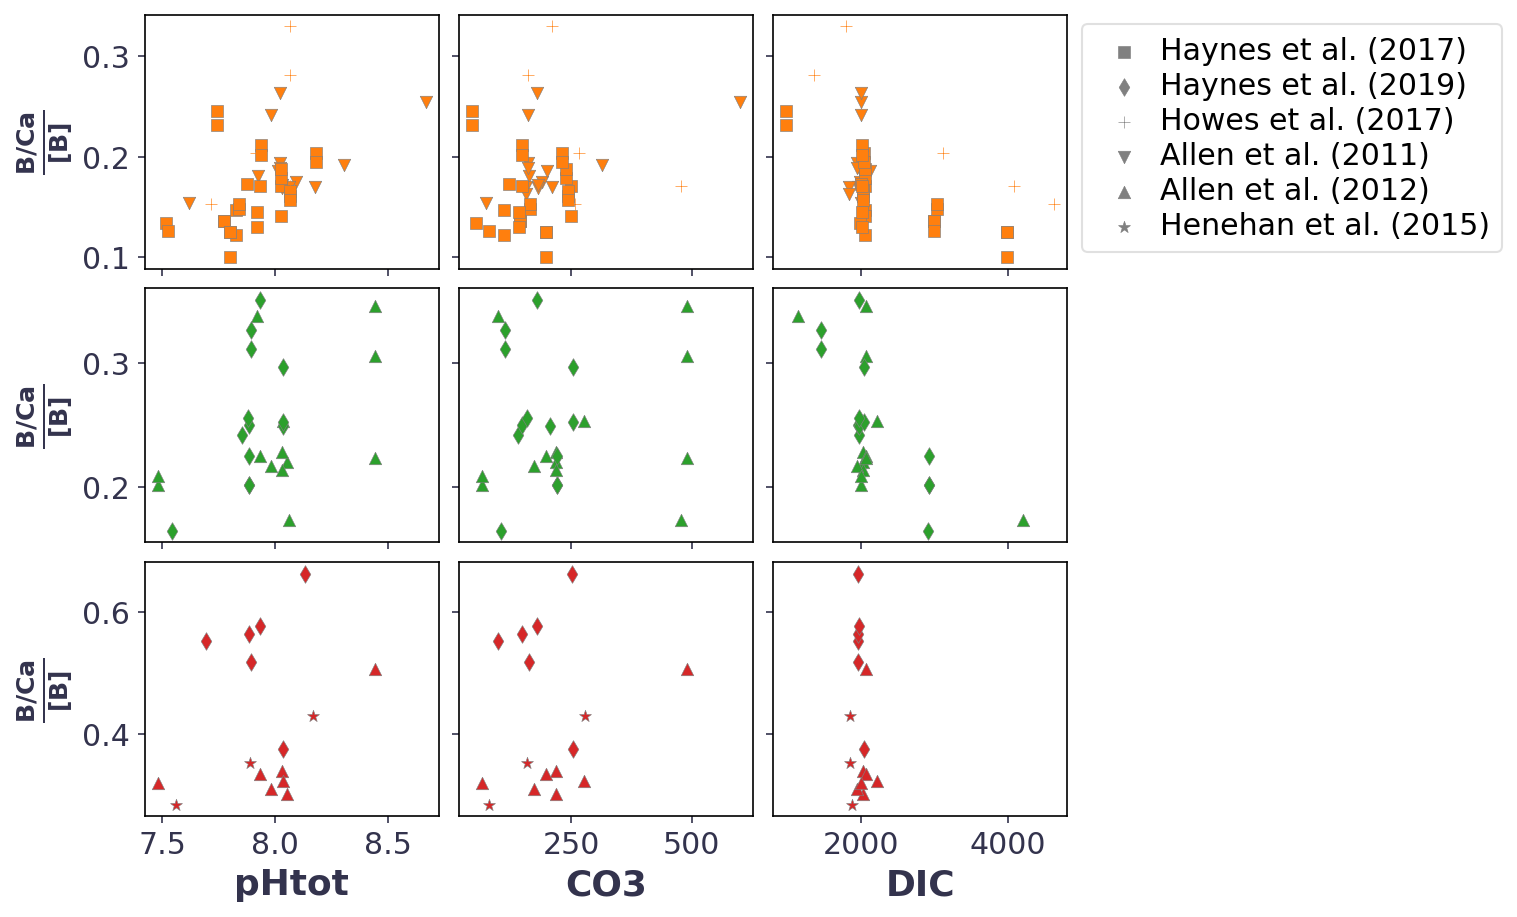

In [103]:
fig, axs = plt.subplots(3,3, figsize=(10, 6), sharex='col', sharey='row', constrained_layout=True)

axdict = {s: axs[i] for i, s in enumerate(cdict)}

xvars = ['pHtot', 'CO3', 'DIC']

for (species, who), g in odat.groupby([('Measured', 'Species'), ('Measured', 'who')]):
    if who == 'This Study':
        continue
    
    row = axdict[species]
    
    for ax, xv in zip(row, xvars):
    
        ax.scatter(g.csys_mid[xv], nom(g.Measured['B/Caf'] / g.Measured['[B]sw']), c=cdict[species], marker=mdict[who], **scatter_opts)
        if ax.get_subplotspec().is_last_row():
            ax.set_xlabel(xv)

    row[0].set_ylabel(r'$\frac{B/Ca}{[B]}$')
    

for who in mdict:
    if who == 'This Study':
        continue
    axs[0,-1].scatter([],[],label=who,marker=mdict[who], **scatter_opts, color='grey')
axs[0,-1].legend(bbox_to_anchor=[1, 1.02])